# PLOTS
## CIS 3203N GROUP 3  

**Thesis Partner 1:** Dejito, Christine Ann  
**Thesis Partner 2:** Roca, Zophia Maureen  
**Date:** February 9, 2025  

---

## Instructions
- Use the same font and font size for all graphs.
- Collate the separate graphs into **one single image** for printing.
- Ensure the collated image is **clearly visible** when pasted on a long bond paper.

---

## Deadline
- **Monday, February 10, 2025, at 2:00 PM.**

---

## Deliverables
1. Python code.
2. `.png` files of each graph.
3. `.png` file of the collated graphs.
4. A sample of the collated file pasted into a document, saved as a `.pdf` file.
5. Push everything to your GitHub account.

---

## Code Implementation

### (a) Bar Graph
- Create a horizontal stacked bar chart.
- Transform `1` into **"Yes"** and `0` into **"No"**.
- Follow the plot specifications for the bar plot.

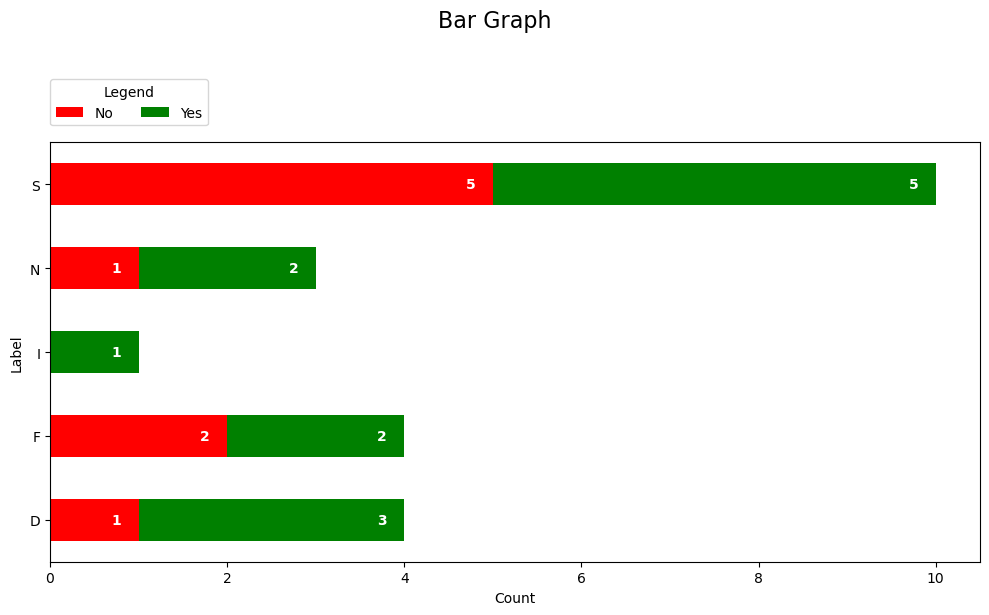

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load dataset from CSV
file_path = os.path.join(os.getcwd(), "bar_assignment.csv")
df = pd.read_csv(file_path)

# Ensure correct column names
expected_columns = ['LABEL', 'COUNT']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"CSV file must contain the columns: {expected_columns}")

# Replace 1 with 'Yes' and 0 with 'No'
df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Group by LABEL and COUNT, and get the count of each
grouped = df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, color=['red', 'green'], figsize=(10, 6))

# Annotating individual counts for each section, aligned to the right
for i, (label, counts) in enumerate(grouped.iterrows()):
    yes_count = counts['Yes']
    no_count = counts['No']
    
    # Add individual counts for the red (No) section, right-aligned
    if no_count > 0:
        ax.text(no_count - 0.2, i, f'{no_count}', va='center', ha='right', color='white', fontweight='bold')
    
    # Add individual counts for the green (Yes) section, right-aligned
    if yes_count > 0:
        ax.text(yes_count + no_count - 0.2, i, f'{yes_count}', va='center', ha='right', color='white', fontweight='bold')

# Customizing the plot
plt.suptitle("Bar Graph", fontsize=16, ha='center', va='bottom')  # Title above the plot
plt.xlabel("Count")
plt.ylabel("Label")
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(0, 1.15), borderaxespad=0., ncol=2)
plt.tight_layout()

# Display the plot
plt.show()